## Anomaly Detection

This project aims to perform anomaly detection using machine learning models. It involves data preprocessing, model training, evaluation, and prediction on test data. The project utilizes several Python libraries, including numpy, pandas, matplotlib, and seaborn.

### Dataset Download:
The dataset can be downloaded from the following link: [Anomaly Detection Dataset](https://www.kaggle.com/competitions/anomaly-detection/data)

## Importing necessary libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

## Loading training and test datasets

In [70]:
train_df = pd.read_csv('anomaly-detection-dataset/train.csv')
test_df = pd.read_csv('anomaly-detection-dataset/test.csv')

In [71]:
train_df.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


## Data Preprocessing

In [72]:
# Checking for missing values
train_df.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [73]:
label_encoder = LabelEncoder()
train_df['is_anomaly'] = label_encoder.fit_transform(train_df['is_anomaly'])

In [74]:
train_df.describe()

,timestamp,value,is_anomaly,predicted
count,1.583000e+04,15830.000000,15830.000000,15830.000000
mean,1.427383e+09,85.572205,0.049021,71.870715
std,1.370962e+06,321.760918,0.215918,92.450520
min,1.425009e+09,0.000000,0.000000,-281.389070
25%,1.426196e+09,29.000000,0.000000,32.919171
50%,1.427383e+09,47.000000,0.000000,49.771124
75%,1.428570e+09,76.000000,0.000000,75.948052
max,1.429757e+09,13479.000000,1.000000,2716.127200


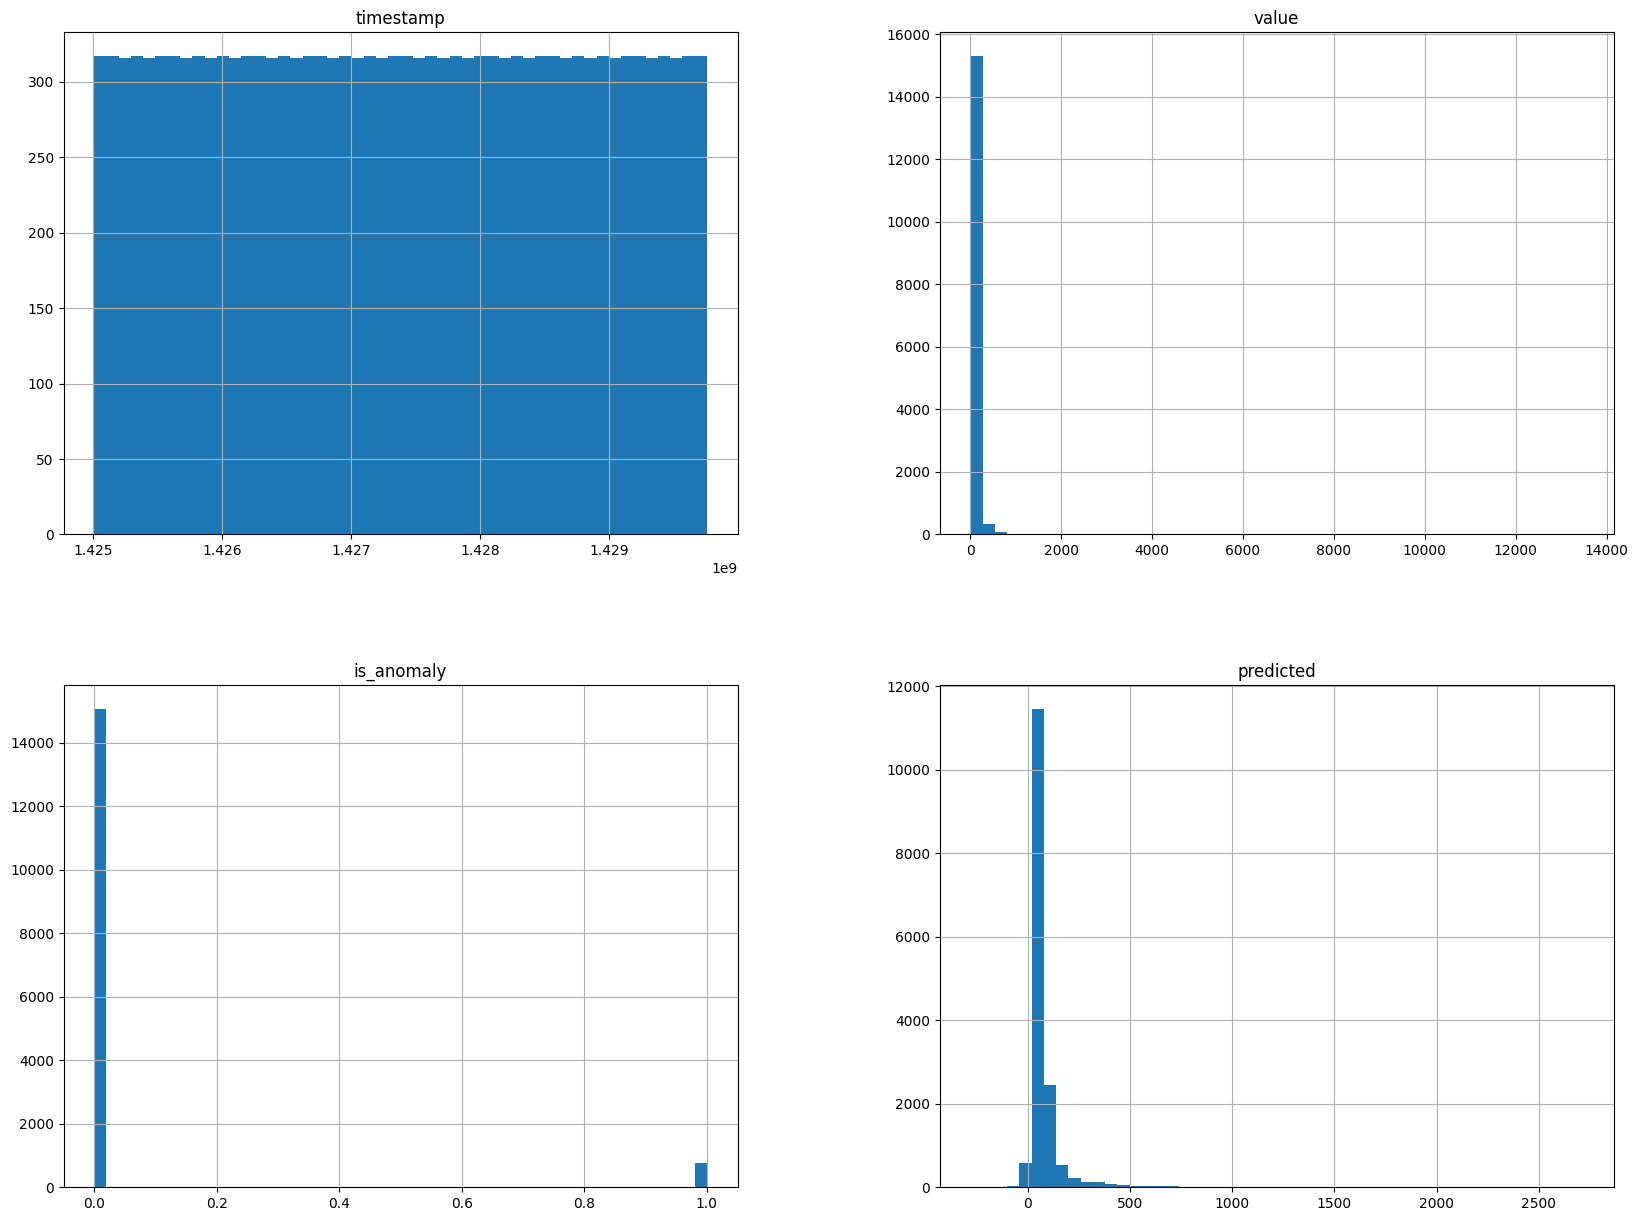

In [75]:
# Plotting the histogram
train_df.hist(bins=50, figsize=(20,15))
plt.show()

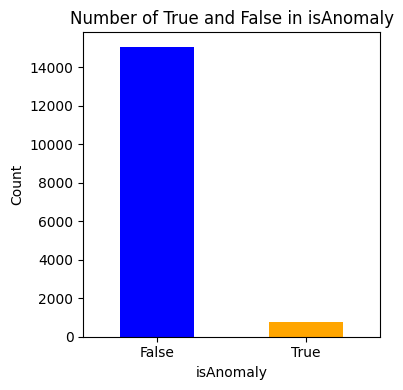

In [76]:
# Plotting the histogram for isAnomaly
plt.figure(figsize=(4, 4))
train_df['is_anomaly'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of True and False in isAnomaly')
plt.xlabel('isAnomaly')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.tight_layout()
plt.show()

#### To address the imbalance in this dataset, where the number of True instances is less than False, we will apply SMOTE for balancing

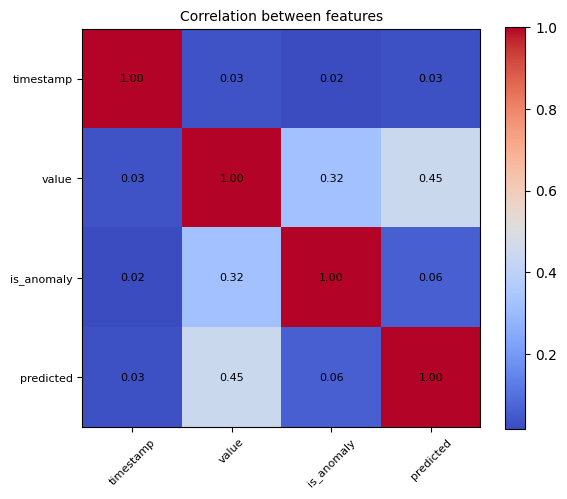

In [77]:
# Displaying correlation matrix
corr_matrix_train = train_df.corr()

plt.figure(figsize=(6, 5)) 

plt.imshow(corr_matrix_train, cmap='coolwarm', interpolation='nearest')

plt.colorbar()

plt.xticks(np.arange(len(corr_matrix_train.columns)), corr_matrix_train.columns, rotation=45, fontsize=8)  
plt.yticks(np.arange(len(corr_matrix_train.columns)), corr_matrix_train.columns, fontsize=8)  

for i in range(len(corr_matrix_train.columns)):
    for j in range(len(corr_matrix_train.columns)):
        plt.text(j, i, f"{corr_matrix_train.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8) 
plt.title('Correlation between features', fontsize=10) 
plt.tight_layout()
plt.show()


## Dividing the dataset into features and target variable

In [78]:
X = train_df.drop(columns=['is_anomaly'],inplace=False,axis=1)
y = train_df['is_anomaly']

In [79]:
# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_dataset = scaler.transform(test_df)

In [81]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [82]:
# Before and after resampling
print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_train_smote)}")

Original dataset shape: Counter({0: 12057, 1: 607})
Resampled dataset shape: Counter({0: 12057, 1: 12057})


## Model Evaluation

In [83]:
# Initializing ML models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

In [84]:
# Training and evaluating models
results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    results.append([name, accuracy, precision, recall, f1])

[19:14:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
# Converting results to DataFrame for better display
results_df = pd.DataFrame(results, columns=['ML Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df

,ML Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.937145,0.962825,0.937145,0.946037
1,Decision Tree,0.951674,0.961526,0.951674,0.955489
2,Random Forest,0.960834,0.968241,0.960834,0.963588
3,Gradient Boosting,0.939987,0.964565,0.939987,0.948365
4,Support Vector Classifier,0.942198,0.962481,0.942198,0.949385
5,K-Nearest Neighbors,0.950411,0.966596,0.950411,0.955998
6,XGBoost,0.963992,0.970243,0.963992,0.966309


## Making Predictions on Test Data

In [86]:
# Choosing the best model
best_model = RandomForestClassifier()
best_model.fit(X_train_smote, y_train_smote)

predictions = best_model.predict(test_dataset)
predictions_bool = predictions == 1

# Converting predictions to DataFrame and saving to CSV file
submission_df = pd.DataFrame({
    'timestamp': test_df['timestamp'],  
    'is_anomaly': predictions_bool  
})

submission_df.to_csv('predicted_data.csv', index=False)

In [87]:
submission_df

,timestamp,is_anomaly
0,1396332000,False
1,1396332300,False
2,1396332600,False
3,1396332900,False
4,1396333200,False
...,...,...
3955,1397518500,False
3956,1397518800,False
3957,1397519100,False
3958,1397519400,False


In [88]:
true_count = submission_df['is_anomaly'].value_counts()[True]
false_count = submission_df['is_anomaly'].value_counts()[False]

# Printing the number of True and False values in the is_anomaly column
print(f"Number of True values: {true_count}")
print(f"Number of False values: {false_count}")

Number of True values: 26
Number of False values: 3934
